#          Data Visualization with Haberman's Data Set 

 ## Haberman's Survival Data set

Haberman's Survival Dataset: [https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1]

Data Set Information:

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


Attribute Information:

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year


# Objective:
   Our obective is to classify the persons who are survived after the surgery from the persons who are dead after the surgery(within 5 years of surgery) so that we can predict whether the new patient will survive after 5 years of the surgery or not based upon the patient's age and the number of positive axillary nodes detected

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Storing the heaberman's datset into a dataframe
haberman = pd.read_csv("C:\ML\habermans-survival-data-set.zip") 

#Adding the column headers to the haberman's survival dataset
haberman.columns = ["Age of patient at time of operation","Patients year of operation","Number of positive axillary nodes detected","Survival status"]


 ## 1) Performing statistics on the data

In [99]:
# Q-1.1) Number of datapoints and number of features?
# Displaying the number of rows and columns in the haberman's survival dataset
print(haberman.shape)

(305, 4)


In [43]:
# Q-1.2) Number of features in the dataset?
# Displaying the column names of the haberman's survival dataset
print (haberman.columns)

Index(['Age of patient at time of operation', 'Patients year of operation',
       'Number of positive axillary nodes detected', 'Survival status'],
      dtype='object')


In [44]:
# Q-1.3 How many data points for each class are present? 
#(or) How many people survived more than 5 years after detection of cancer(status =1) and less than 5 years after
#detection of cancer(status=2)

haberman["Survival status"].value_counts()

1    224
2     81
Name: Survival status, dtype: int64

#  2)Univariate analysis-Pdf,Cdf,Boxplot,Violin Plots

# 2.1)PDF of 'Age of patient a time of operation' feature

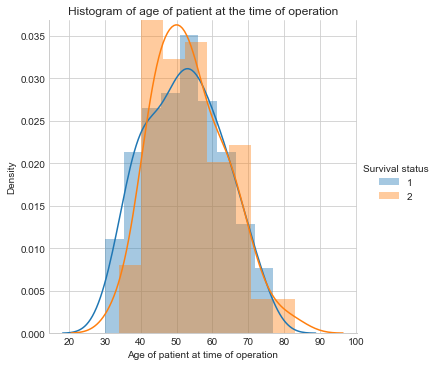

In [103]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Age of patient at time of operation") \
    .add_legend();
plt.title("Histogram of age of patient at the time of operation")
plt.ylabel("Density") 
plt.show();


# 2.2)PDF of 'Patients year of operation' feature

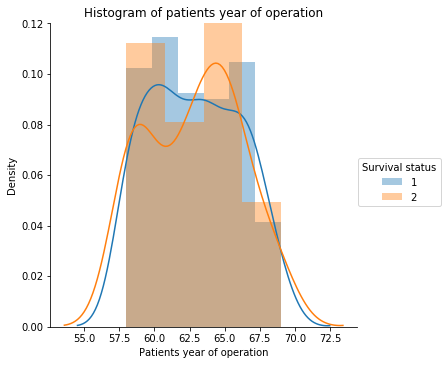

In [50]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Patients year of operation") \
    .add_legend();
plt.title("Histogram of patients year of operation")
plt.ylabel("Density") 
plt.show();

# 2.3)PDF of 'Number of positive axillary nodes detected' feature

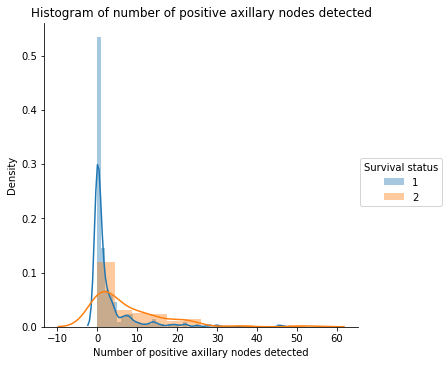

In [83]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Number of positive axillary nodes detected") \
    .add_legend();
plt.title("Histogram of number of positive axillary nodes detected")
plt.ylabel("Density") 
plt.show();

# Observations:
1).There is a lot of overlapping in histograms of "Age of patient at time of operation" and "Patients year of operation"            
2).From the "Number of positive axillary nodes detected" histogram we can know that if the number of axillary nodes detected is >30 then the person will die within 5 years of surgery

# 3) Visualizing with CDF

# 3.1)CDF of 'Age of patient a time of operation' feature

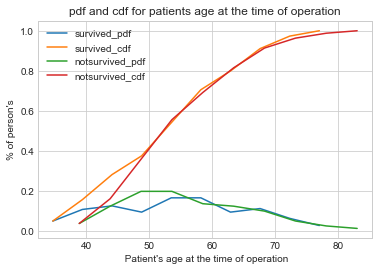

In [123]:
statusone = haberman.loc[haberman["Survival status"] == 1]
statustwo = haberman.loc[haberman["Survival status"] == 2]
label = ["survived_pdf", "survived_cdf", "notsurvived_pdf", "notsurvived_cdf"]
counts, bin_edges = np.histogram(statusone["Age of patient at time of operation"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for patients age at the time of operation")
plt.xlabel(" Patient's age at the time of operation")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(statustwo["Age of patient at time of operation"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

# 3.2)CDF of 'Patients year of operation' feature

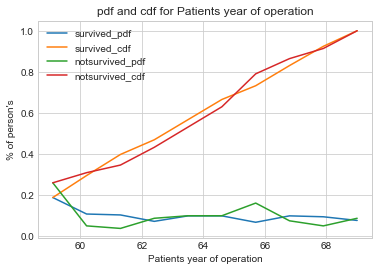

In [107]:
label = ["survived_pdf", "survived_cdf", "notsurvived_pdf", "notsurvived_cdf"]
counts, bin_edges = np.histogram(statusone["Patients year of operation"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(statustwo["Patients year of operation"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for Patients year of operation")
plt.xlabel("Patients year of operation")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show();

# 3.3)CDF of 'Number of positive axillary nodes detected' feature

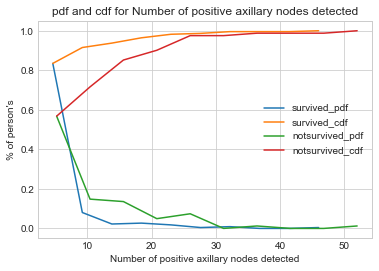

In [120]:
label = ["survived_pdf", "survived_cdf", "notsurvived_pdf", "notsurvived_cdf"]
counts, bin_edges = np.histogram(statusone["Number of positive axillary nodes detected"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(statustwo["Number of positive axillary nodes detected"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for Number of positive axillary nodes detected")
plt.xlabel("Number of positive axillary nodes detected")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show();

# Observations:
1)In first graph 95% Survived whose Age is less then 70 and also 95% Died whose Age is less then 70.  
2)In second graph the 95% Survived whose year of operation is lies in b/w 1958 to 1968 and also the 95% Died whose 
year of operationr lies in b/w 1958 to 1967
3)In third graph 95% Survived whose Number of positive axillary nodes is less then 10 & 95% not able to survive whose Number of positive axillary nodese is less the 23.  

# 4)Boxplot:

# 4.1)Boxplot for 'Age of patient at time of operation':

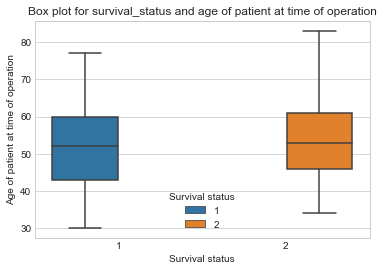

In [124]:
sns.boxplot(x='Survival status',y='Age of patient at time of operation',hue="Survival status", data=haberman).set_title("Box plot for Survival status and age of patient at time of operation")
plt.show()

# 4.2)Boxplot for 'Patients year of operation':

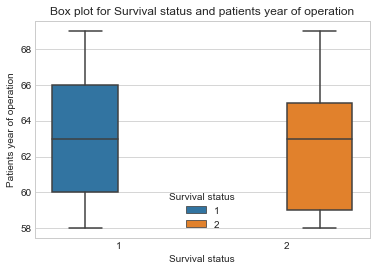

In [126]:
sns.boxplot(x='Survival status',y='Patients year of operation',hue="Survival status", data=haberman).set_title("Box plot for Survival status and patients year of operation")
plt.show()

# 4.3)Boxplot for 'Number of positive axillary nodes detected':

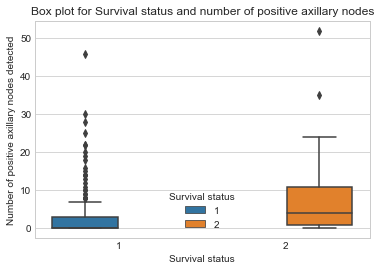

In [125]:
sns.boxplot(x='Survival status',y='Number of positive axillary nodes detected',hue="Survival status", data=haberman).set_title("Box plot for Survival status and number of positive axillary nodes")
plt.show()

# Observations:
1)In first box plot graph the Age whose Survival status is 1 the 25th - 75th percentile value lies 42 to 60 and whose Survival status is 2 the 25th - 75th value lies from 46 to 62.   
2)In second box plot graph the year of operation whose Survival status is 1 the 25th - 75th percentile value lies 60 to 66 and whose Survival status is 2 is 25th - 75th value lies from 59 to 65.  
3)In third box plot the Number of positive axillary nodes whose Survival statuss is 1 the 25th - 75th percentile value lies 0 to 4 and whose Survival statusis 2 is 25th and 75th values lies from 1 to 11.

# 5)Violinplots

# 5.1)Violinplot for 'Age of patient at time of operation':

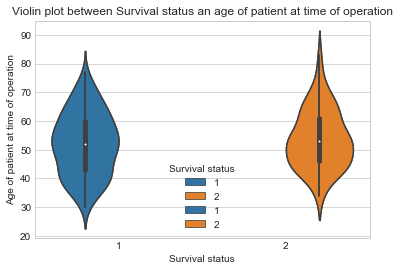

In [129]:
sns.violinplot(x='Survival status',y='Age of patient at time of operation',hue="Survival status", data=haberman)
plt.title('Violin plot between Survival status and age of patient at time of operation')
plt.show()

# 5.2)Violinplot for 'Patients year of operation':

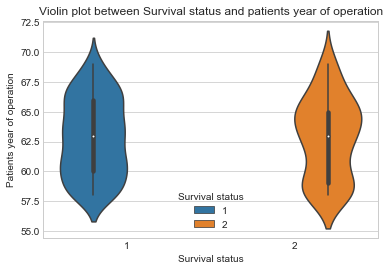

In [130]:
sns.violinplot(x='Survival status',y='Patients year of operation',hue="Survival status", data=haberman)
plt.title('Violin plot between Survival status and patients year of operation')
plt.show()

# 5.3)Violinplot for 'Number of positive axillary nodes detected':

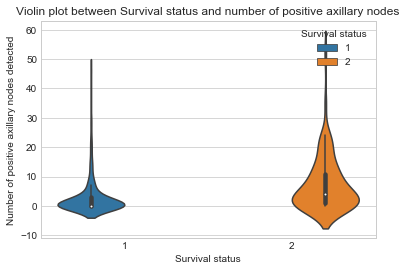

In [131]:
sns.violinplot(x='Survival status',y='Number of positive axillary nodes detected',hue="Survival status", data=haberman)
plt.title('Violin plot between Survival status and number of positive axillary nodes')
plt.show()

# Observations:
   We can't derive much conclusion from the violin plots.

# 6) Bi-variate analysis

# 6.1) 1-D Scatter plot

# 6.2) 1-D Scatter plot for 'Age of patient at time of operation'

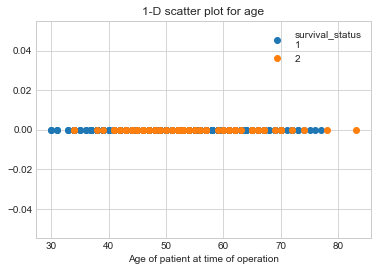

In [115]:
statusone = haberman.loc[haberman["Survival status"] == 1]
statustwo = haberman.loc[haberman["Survival status"] == 2]
plt.plot(statusone["Age of patient at time of operation"], np.zeros_like(statusone["Age of patient at time of operation"]), 'o', label = "survival_status\n" "1")
plt.plot(statustwo["Age of patient at time of operation"], np.zeros_like(statustwo["Age of patient at time of operation"]), 'o', label = "2")
plt.title("1-D scatter plot for age")
plt.xlabel("Age of patient at time of operation")
plt.legend()
plt.show()


# 6.2) 1-D Scatter plot for 'Patients year of operation'

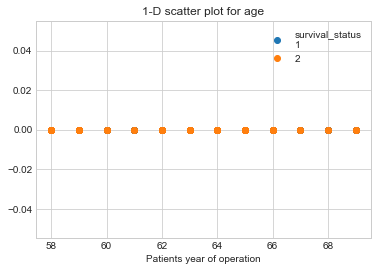

In [116]:
statusone = haberman.loc[haberman["Survival status"] == 1]
statustwo = haberman.loc[haberman["Survival status"] == 2]
plt.plot(statusone["Patients year of operation"], np.zeros_like(statusone["Patients year of operation"]), 'o', label = "survival_status\n" "1")
plt.plot(statustwo["Patients year of operation"], np.zeros_like(statustwo["Patients year of operation"]), 'o', label = "2")
plt.title("1-D scatter plot for age")
plt.xlabel("Patients year of operation")
plt.legend()
plt.show()

# 6.3) 1-D Scatter plot for 'Number of positive axillary nodes detected'

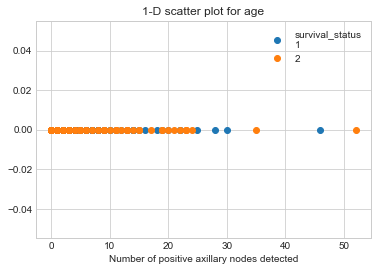

In [117]:
statusone = haberman.loc[haberman["Survival status"] == 1]
statustwo = haberman.loc[haberman["Survival status"] == 2]
plt.plot(statusone["Number of positive axillary nodes detected"], np.zeros_like(statusone["Number of positive axillary nodes detected"]), 'o', label = "survival_status\n" "1")
plt.plot(statustwo["Number of positive axillary nodes detected"], np.zeros_like(statustwo["Number of positive axillary nodes detected"]), 'o', label = "2")
plt.title("1-D scatter plot for age")
plt.xlabel("Number of positive axillary nodes detected")
plt.legend()
plt.show()

# Observations:
1) From "Age of patient at time of operation" plot,we can infer that many people died between age 38 and 70                   
2) From "Number of positive axillary nodes detected" plot,we can infer if the number of auxillary nodes<25 then most probably the person dies

# 7) 2-D Scatter plot

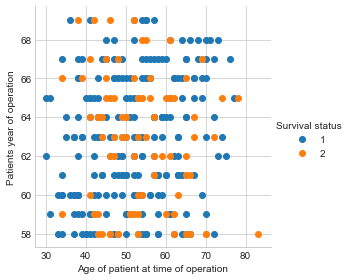

In [92]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival status", size=4) \
   .map(plt.scatter, "Age of patient at time of operation", "Patients year of operation") \
   .add_legend();
plt.show();

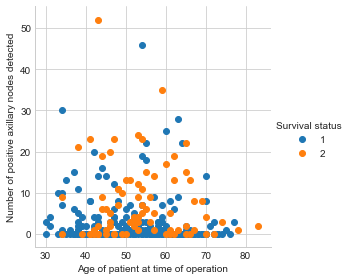

In [93]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival status", size=4) \
   .map(plt.scatter, "Age of patient at time of operation", "Number of positive axillary nodes detected") \
   .add_legend();
plt.show();

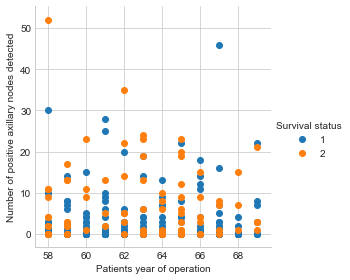

In [94]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival status", size=4) \
   .map(plt.scatter, "Patients year of operation", "Number of positive axillary nodes detected") \
   .add_legend();
plt.show();

# Observations:
             From the 2- D plot,we can infer that the data is not linearly seperable

# 8)Pair plots-3D Scatter plot

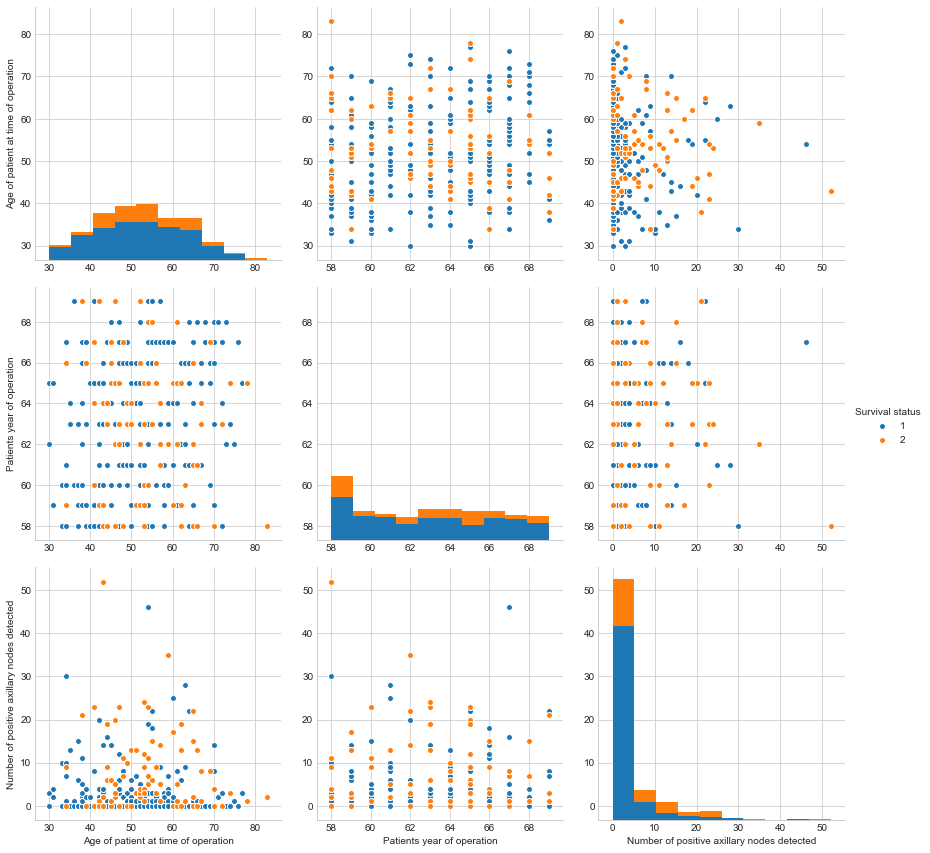

In [127]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival status",vars = ["Age of patient at time of operation", "Patients year of operation", "Number of positive axillary nodes detected"], size=4);
plt.show()

# Observations:
1.From the above plots,we can infer that the data is not linearly seperable         
2.If the number of positive auxillary nodes=0 an if age is between 40-50,it is more likely to die and if the age is between 50-60,it is more likely to survive for >5 years


# Overall conclusion:
   By plotting all pdf, cdf, box-plot, pair plots, scatter plot etc,we can get the following conclusions: 
          
1.The given data is not linerly seperable and hence it is difficult to classify which feature is more important  
2.However,"Number of positive axillary nodes detected" is the most important compared to remaining features and then "Age of patient at time of operation" and the plot between them is useful               
3.The given dataset is imbalanced(225-Survived & 81-Survived)as it does not contains equal number of data-points for each class.  
4.Therefore,Using if-else statements to classify the data is not possible and need additional features to classify better.